In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os

Sample happy image:


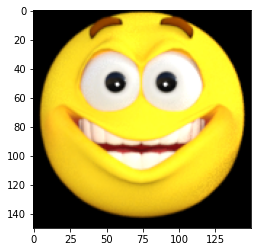


Sample sad image:


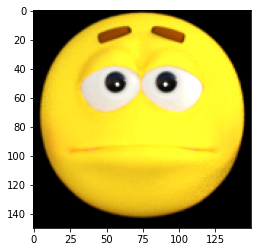

In [2]:
from tensorflow.keras.preprocessing.image import load_img

happy_dir = "./data/happy/"
sad_dir = "./data/sad/"

print("Sample happy image:")
plt.imshow(load_img(f"{os.path.join(happy_dir, os.listdir(happy_dir)[0])}"))
plt.show()

print("\nSample sad image:")
plt.imshow(load_img(f"{os.path.join(sad_dir, os.listdir(sad_dir)[0])}"))
plt.show()


In [3]:
len(os.listdir(happy_dir))

34

In [4]:
len(os.listdir("./data_validation/happy/"))

6

In [5]:
from tensorflow.keras.preprocessing.image import img_to_array

# Load the first example of a happy face
sample_image  = load_img(f"{os.path.join(happy_dir, os.listdir(happy_dir)[0])}")

# Convert the image into its numpy array representation
sample_array = img_to_array(sample_image)

print(f"Each image has shape: {sample_array.shape}")

print(f"The maximum pixel value used is: {np.max(sample_array)}")

Each image has shape: (150, 150, 3)
The maximum pixel value used is: 255.0


In [6]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_accuracy') is not None and logs.get('val_accuracy') > 0.999 and logs.get('accuracy') > 0.999:
            print("\nReached 99.9% accuracy so cancelling training!")
            self.model.stop_training = True

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def image_generator():
    
    train_datagen = ImageDataGenerator(rescale=1/255)
    test_datagen = ImageDataGenerator(rescale=1/255)

    train_generator = train_datagen.flow_from_directory(directory='./data',
                                                        target_size=(150, 150),
                                                        batch_size=10,
                                                        class_mode='binary')
    test_generator = train_datagen.flow_from_directory(directory='./data_validation',
                                                        target_size=(150, 150),
                                                        batch_size=10,
                                                        class_mode='binary')

    return train_generator, test_generator
    

In [8]:
train_gen, test_gen = image_generator()

Found 68 images belonging to 2 classes.
Found 12 images belonging to 2 classes.


In [9]:
from tensorflow.keras import optimizers, losses
dir(optimizers)

['Adadelta',
 'Adagrad',
 'Adam',
 'Adamax',
 'Ftrl',
 'Nadam',
 'Optimizer',
 'RMSprop',
 'SGD',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'deserialize',
 'experimental',
 'get',
 'legacy',
 'schedules',
 'serialize']

In [10]:
from tensorflow.keras import optimizers, losses
from tensorflow.keras.optimizers import RMSprop

def train_happy_sad_model(train_generator, test_generator):

    # Instantiate the callback
    callbacks = myCallback()

    model = tf.keras.models.Sequential([ 
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model
    #model.compile(loss=losses.BinaryCrossentropy,
    #              optimizer=optimizers.RMSprop,
    #              metrics=['accuracy']) 
    model.compile(loss='binary_crossentropy',
                  optimizer=RMSprop(learning_rate=0.001),
                  metrics=['accuracy'])

    history = model.fit(x=train_generator,
                        epochs=15,
                        callbacks=[callbacks],
                       validation_data = test_generator) 
    return history

In [11]:
hist = train_happy_sad_model(train_gen,test_gen)

Epoch 1/15
7/7 [==============================] - 2s 141ms/step - loss: 2.9490 - accuracy: 0.5882 - val_loss: 0.6751 - val_accuracy: 0.5000
Epoch 2/15
7/7 [==============================] - 1s 117ms/step - loss: 0.6764 - accuracy: 0.5294 - val_loss: 0.6155 - val_accuracy: 0.6667
Epoch 3/15
7/7 [==============================] - 1s 125ms/step - loss: 0.6329 - accuracy: 0.6176 - val_loss: 0.5839 - val_accuracy: 0.5000
Epoch 4/15
7/7 [==============================] - 1s 125ms/step - loss: 0.4079 - accuracy: 0.8529 - val_loss: 0.4376 - val_accuracy: 0.6667
Epoch 5/15
7/7 [==============================] - 1s 122ms/step - loss: 0.3228 - accuracy: 0.8676 - val_loss: 0.1824 - val_accuracy: 0.9167
Epoch 6/15
7/7 [==============================] - 1s 121ms/step - loss: 0.1362 - accuracy: 0.9706 - val_loss: 0.1497 - val_accuracy: 0.9167
Epoch 7/15
7/7 [==============================] - 1s 122ms/step - loss: 0.0650 - accuracy: 0.9853 - val_loss: 0.2008 - val_accuracy: 0.9167
Epoch 8/15
7/7 [====

In [12]:
print(f"Your model reached the desired accuracy after {len(hist.epoch)} epochs")

Your model reached the desired accuracy after 10 epochs
